# This is my analysis of the edX dataset on Kaggle.com

In 2012, the Massachusetts Institute of Technology (MIT) and Harvard University launched open online courses on edX, a non-profit learning platform co-founded by the two institutions. This report provides data on 290 Harvard and MIT online courses, 250 thousand certifications, 4.5 million participants, and 28 million participant hours on the edX platform since 2012.

During the following lines of code I want to examine the dataset, following the three research questions: 
    
#### 1. How popular is the content on edX? 
#### 2. Are there any noteable difference between the two instututions? 
#### 3. What influences the certification rate?

### But first things first: Importing the libraries and data wrangling: 

In [4]:
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import math
import numpy as np
import seaborn as sns 

First look at the data: 

In [5]:
df = pd.read_csv('appendix.csv')
df.head(3)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [6]:
df.head(0)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher


Show missing values: 

In [7]:
def num_missing(x):
  return sum(x.isnull())

In [8]:
print "Missing values per column:"
print df.apply(num_missing, axis=0)

Missing values per column:
Institution                                     0
Course Number                                   0
Launch Date                                     0
Course Title                                    0
Instructors                                     1
Course Subject                                  0
Year                                            0
Honor Code Certificates                         0
Participants (Course Content Accessed)          0
Audited (> 50% Course Content Accessed)         0
Certified                                       0
% Audited                                       0
% Certified                                     0
% Certified of > 50% Course Content Accessed    0
% Played Video                                  0
% Posted in Forum                               0
% Grade Higher Than Zero                        0
Total Course Hours (Thousands)                  0
Median Hours for Certification                  0
Median Age             

In [9]:
 df['Instructors'].fillna('No instructor name',inplace=True)

There is one missing value in the insctructors column. So we fill this missing value with the replacement "no instructor name".

Let's see if it worked:

In [10]:
print "Missing values per column:"
print df.apply(num_missing, axis=0)

Missing values per column:
Institution                                     0
Course Number                                   0
Launch Date                                     0
Course Title                                    0
Instructors                                     0
Course Subject                                  0
Year                                            0
Honor Code Certificates                         0
Participants (Course Content Accessed)          0
Audited (> 50% Course Content Accessed)         0
Certified                                       0
% Audited                                       0
% Certified                                     0
% Certified of > 50% Course Content Accessed    0
% Played Video                                  0
% Posted in Forum                               0
% Grade Higher Than Zero                        0
Total Course Hours (Thousands)                  0
Median Hours for Certification                  0
Median Age             

Now, let's change the format of the launch date to datetime:

In [11]:
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

### Data Summary

In [12]:
df.describe()

,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,3.172414,0.813793,15344.334483,2549.172414,843.810345,24.916966,7.782586,31.445655,9.347517,21.210379,94.981828,44.364552,29.300000,67.010690,32.989310,72.078724
std,0.906301,0.389946,28207.578733,3095.159969,1105.594372,15.883538,6.972437,19.751102,7.517141,13.411540,157.617610,43.953709,4.047897,15.843642,15.843642,10.256434
min,1.000000,0.000000,322.000000,187.000000,0.000000,2.630000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,22.000000,25.240000,6.560000,44.950000
25%,3.000000,1.000000,3815.000000,755.250000,139.500000,14.215000,2.407500,13.400000,3.992500,10.590000,12.960000,12.242500,26.000000,54.170000,18.367500,64.515000
50%,3.000000,1.000000,7901.500000,1517.000000,395.500000,20.425000,5.950000,31.270000,7.245000,19.605000,37.710000,26.965000,29.000000,66.515000,33.485000,73.055000
75%,4.000000,1.000000,18038.250000,3383.000000,1201.750000,33.837500,10.687500,47.622500,14.107500,30.902500,97.225000,64.177500,31.000000,81.632500,45.830000,79.245000
max,4.000000,1.000000,301082.000000,25637.000000,5783.000000,83.960000,33.980000,77.090000,35.280000,52.350000,895.010000,251.820000,53.000000,93.440000,74.760000,98.110000


# 1. Question: How popular are the online courses on edX?

Let's take a look at the total number of participants on the platform: 

In [13]:
total_participants = df['Participants (Course Content Accessed)'].sum()
total_participants

4449857

Impressive! Now let's break that down to the single courses offered: 

First, let's look how many courses have been offered over time:

In [14]:
df[['Launch Date']]

,Launch Date
0,2012-09-05
1,2012-09-26
2,2012-10-09
3,2012-10-15
4,2012-10-15
5,2013-02-04
6,2013-02-05
7,2013-02-12
8,2013-02-18
9,2013-03-02


We can see that it starts in September 2012 and ends in August 2016. 

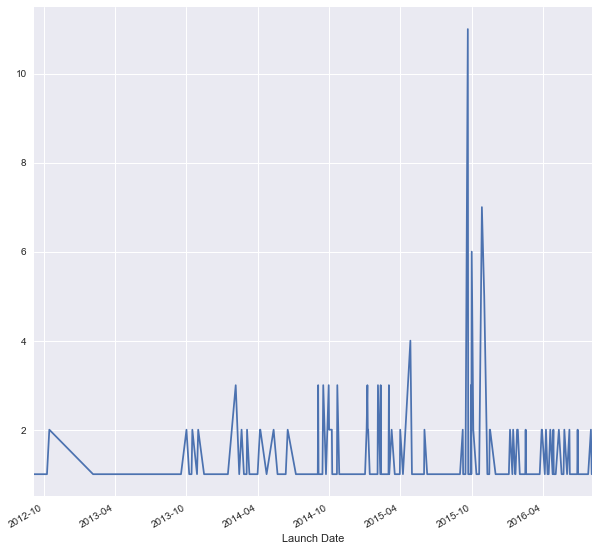

In [15]:
df[['Launch Date']].groupby('Launch Date').size().plot(figsize=(10,10))

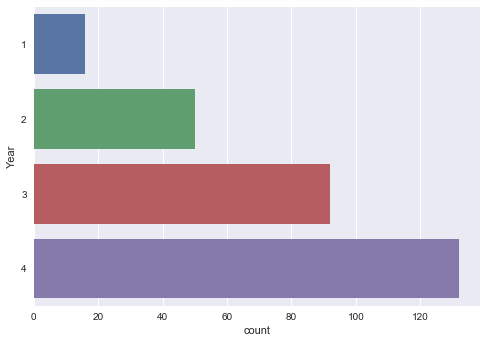

In [19]:
sns.countplot(y="Year", data=df)


- The number of courses launched seems to increase each year

##### Let's look at the total number of unique courses edX offers:

In [28]:
len(df['Course Number'].unique())

188

Are some courses offered more than once?

In [29]:
len(df['Course Number'])

290

This shows us that some Courses have been offered multiple times. Let's take a closer look:

In [30]:
df['Course Number'].value_counts().head(10)

6.00.1x    9
3.091x     7
6.002x     5
6.00.2x    5
CS50x      4
15.071x    4
7.00x      4
14.73x     4
VJx        3
6.041x     3
Name: Course Number, dtype: int64

This shows us, that some courses have been offered multiple times (up to 9 times max).

Let's take a look at the <b> two most frequently offered </b> courses (not the one with the most participants): 

- "Introduction to Computer Science and Programming" at MITx

In [31]:
df[df["Course Number"]=="6.00.1x"].head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
27,MITx,6.00.1x,2013-10-16,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag",Computer Science,2,1,57147,8248,...,60.23,76.86,9.47,43.16,523.56,53.05,28.0,82.95,17.05,62.73


In [32]:
intro_cs = df[df["Course Number"]=="6.00.1x"]
intro_cs_frame = intro_cs.groupby(["Launch Date","Course Title"])["Participants (Course Content Accessed)"].sum().to_frame()
print(intro_cs_frame)
print("Total number of participants of course 6.00.1x:")
intro_cs_frame["Participants (Course Content Accessed)"].sum()

                                                                Participants (Course Content Accessed)
Launch Date Course Title                                                                              
2013-10-16  Introduction to Computer Science and Programming                                     57147
2014-02-19  Introduction to Computer Science and Programming                                     21063
2014-06-11  Introduction to Computer Science and Programming                                     22148
2014-08-27  Introduction to Computer Science and Programming                                     21017
2015-01-07  Introduction to Computer Science and Programmin...                                   49529
2015-06-10  Introduction to Computer Science and Programming                                     53964
2015-08-26  Introduction to Computer Science and Programmin...                                   54361
2016-01-13  Introduction to Computer Science and Programmin...           

364099

#### ->This equals to 8% of all the participants of the edX platform!

The 2nd most offered course: 

- "Introduction to Solid State Chemistry" at MITx

In [33]:
df[df["Course Number"]=="3.091x"].head(1)


,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [34]:
intro_solidstate_chemistry = df[df["Course Number"]=="3.091x"]
intro_solidstate_chemistry_frame = intro_solidstate_chemistry.groupby(["Launch Date","Course Title"])["Participants (Course Content Accessed)"].sum().to_frame()
print(intro_solidstate_chemistry_frame)
print("Total number of participants of course 3.091x:")
intro_solidstate_chemistry_frame["Participants (Course Content Accessed)"].sum()

                                                   Participants (Course Content Accessed)
Launch Date Course Title                                                                 
2012-10-09  Introduction to Solid State Chemistry                                   16663
2013-02-05  Introduction to Solid State Chemistry                                    8270
2013-09-01  Introduction to Solid State Chemistry                                   11961
2014-05-12  Introduction to Solid State Chemistry                                    5854
2014-09-03  Introduction to Solid State Chemistry                                    5245
2015-02-26  Introduction to Solid State Chemistry                                    3661
2015-09-08  Introduction to Solid State Chemistry                                    4767
Total number of participants of course 3.091x:


56421

### Are the most frequently offered courses the most popular by their number of participants?

In [35]:
df.sort_values(by='Participants (Course Content Accessed)', ascending=False)[['Institution', 'Course Title','Course Number', 'Participants (Course Content Accessed)']]



,Institution,Course Title,Course Number,Participants (Course Content Accessed)
99,HarvardX,Introduction to Computer Science,CS50x,301082
32,HarvardX,Introduction to Computer Science,CS50x,259577
221,HarvardX,Introduction to Computer Science (2016),CS50x,168335
3,HarvardX,Introduction to Computer Science,CS50x,129400
5,MITx,Introduction to Computer Science and Programming,6.00x,65380
225,MITx,Introduction to Computer Science and Programmi...,6.00.1x,63658
1,MITx,Introduction to Computer Science and Programming,6.00x,62709
24,HarvardX,Science and Cooking: From Haute Cuisine to Sof...,SPU27x,60555
9,HarvardX,Justice,ER22x,58779
27,MITx,Introduction to Computer Science and Programming,6.00.1x,57147


In [36]:
df.groupby('Course Number').sum()[['Participants (Course Content Accessed)']].sort_values(by='Participants (Course Content Accessed)', ascending=False)


,Participants (Course Content Accessed)
Course Number,
CS50x,858394
6.00.1x,364099
6.00x,128089
15.071x,122762
6.002x,116335
SPU27x,109477
ER22x,89478
7.00x,79624
6.041x,66255


In [37]:
most_popular = df[df["Course Number"]=="CS50x"]
most_popular.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.0,1.11,220.9,0.0,28.0,80.02,19.98,58.78


#### Wow, this equals to 19% in relation to the total number of participants!

The hypothesis that the most offered courses are also the most popular courses is <b> true for the "Introduction to Computer Science" </b> Course but not so for the "Introduction to Solid State Chemistry" wcourse which is 12th by number of participants (56421 students) and 2nd by times the course was offered.

Let's check the total numbers of the other most popular couses "Science and Cooking", "Health in Numbers" and "Justice":

In [38]:
second_most_popular = df[df["Course Number"]=="6.00.1x"]
second_most_popular.head(1)


,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
27,MITx,6.00.1x,2013-10-16,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag",Computer Science,2,1,57147,8248,...,60.23,76.86,9.47,43.16,523.56,53.05,28.0,82.95,17.05,62.73


Another Computer Science course!

In [39]:
third_most_popular = df[df["Course Number"]=="6.00x"]
third_most_popular.head(1)


,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.5,884.04,78.53,28.0,83.5,16.5,63.04


- Event the third most popular couse is an introduction to computer science course!

In [40]:
fourth_most_popular = df[df["Course Number"]=="15.071x"]
fourth_most_popular.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
43,MITx,15.071x,2014-03-04,The Analytics Edge,Dimitris Bertsimas,"Government, Health, and Social Science",2,1,31391,4782,...,37.43,73.93,6.68,21.51,313.27,81.94,31.0,81.0,19.0,87.62


In [41]:
fifth_most_popular = df[df["Course Number"]=="6.002x"]
fifth_most_popular.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68


#### The five most popular courses: 
1. "Introduction to Computer Science" cs50 at Harvard with 859'394 students
2. "Introduction to Computer Science" 6.00.1x at MIT with 364099 students
3. "Introduction to Computer Science" 6.00x at MIT with 128089 students
4. "The Analytics Edge" at MIT with 122'762 students
5. "Circuits and Electronics" at MIT with 116'335 students


#### This means that 30% of all the participants are from "Introduction to CS" courses!
#### This means that 36% of all the participants on the platform are from five most popular courses!

Is there a similar "power law" distribution with the productivity of the instructors?

In [42]:
df['Instructors'].value_counts().head(10)

Peter Bol, Bill Kirby                                                    20
Rafael Irizarry                                                          16
Elisa New                                                                 8
Paul Peterson                                                             8
Michael Cima                                                              7
Lorna J. Gibson                                                           7
Frank Bentley, Ed Barrett                                                 7
Anant Agarwal, Gerald Sussman, Piotr Mitros, Chris Terman, Bonnie Lam     6
Tom Kelly                                                                 6
Eric Grimson, John Guttag                                                 6
Name: Instructors, dtype: int64

In [43]:
pb_and_bk = df[df["Instructors"]=="Peter Bol, Bill Kirby"]
pb_and_bk.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
29,HarvardX,SW12.1x,2013-10-31,The Political and Intellectual Foundations of ...,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",2,1,47384,8234,...,44.26,78.7,12.61,32.62,145.08,13.89,29.0,59.22,40.78,74.91


In [44]:
len(pb_and_bk['Course Number'].unique())

10

In [45]:
pb_and_bk['Participants (Course Content Accessed)'].sum()

117042

That means that 2.6% of all the participant went to courses taught by Peter Boll and Bill Kirby, which taught 5% of all the courses available. 

Let's do the same procedure for the second most active Instructor Rafael Irizarry:

In [46]:
rafael_irizarry = df[df["Instructors"]=="Rafael Irizarry"]
len(rafael_irizarry['Course Number'].unique())

9

In [47]:
rafael_irizarry.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
52,HarvardX,PH525x,2014-04-07,Data Analysis for Genomics,Rafael Irizarry,"Government, Health, and Social Science",2,1,13708,3620,...,17.98,70.94,3.77,34.62,58.19,25.79,31.0,67.66,32.34,89.69


In [48]:
rafael_irizarry['Participants (Course Content Accessed)'].sum()

111352

The statistics for him are pretty much the same!

To summarize then:

- 19% of all the courses are instructed by five professors which have together 6% of the students
- These five most active professors are all from Harvard

In [49]:
elisa_new = df[df["Instructors"]=="Elisa New"]
len(elisa_new["Course Number"].unique())

8

In [50]:
elisa_new['Participants (Course Content Accessed)'].sum()
elisa_new.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
30,HarvardX,AI12.1x,2013-10-31,Poetry in America: The Poetry of Early New Eng...,Elisa New,"Humanities, History, Design, Religion, and Edu...",2,0,6446,2873,...,0.0,69.68,15.91,0.0,13.89,0.0,32.0,40.81,59.19,69.5


In [51]:
paul_peterson = df[df["Instructors"]=="Paul Peterson"]
len(paul_peterson["Course Number"].unique())

8

In [52]:
paul_peterson['Participants (Course Content Accessed)'].sum()
paul_peterson.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
75,HarvardX,1368.1x,2014-09-08,"Saving Schools: History, Politics, and Policy ...",Paul Peterson,"Humanities, History, Design, Religion, and Edu...",3,1,3853,969,...,40.35,67.67,16.02,31.5,9.36,10.2,32.0,44.07,55.93,81.88


## How is the popularity in regard to the single subject?

First, how many subjects are there:

In [53]:
len(df['Course Subject'].unique())

4

Let's take a look at the number of courses by subject: 

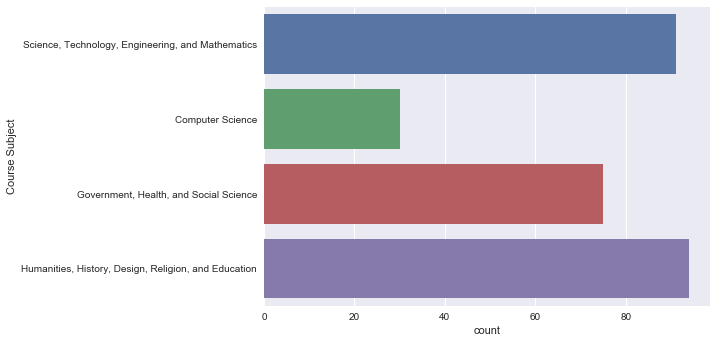

In [54]:
sns.countplot(y="Course Subject", data=df)

Let's now look at the number of participants by subject and subdivided by institution:

In [55]:
participants = df.groupby(["Course Subject","Institution"])["Participants (Course Content Accessed)"].sum().to_frame()
participants = participants/(total_participants)*100
participants

Participants (Course Content Accessed)
Course Subject                                     Institution                                        
Computer Science                                   HarvardX                                  19.290373
                                                   MITx                                      15.032843
Government, Health, and Social Science             HarvardX                                   8.766574
                                                   MITx                                      14.109667
Humanities, History, Design, Religion, and Educ... HarvardX                                  14.221940
                                                   MITx                                       4.261867
Science, Technology, Engineering, and Mathematics  HarvardX                                   4.938833
                                                   MITx                                      19.377904

In [56]:
participants_bysubject= df.groupby(["Course Subject"])["Participants (Course Content Accessed)"].sum()
print('Participants by subject in percent:')
participants_bysubject/(total_participants)*100



Participants by subject in percent:


Course Subject
Computer Science                                        34.323215
Government, Health, and Social Science                  22.876241
Humanities, History, Design, Religion, and Education    18.483807
Science, Technology, Engineering, and Mathematics       24.316736
Name: Participants (Course Content Accessed), dtype: float64

In [57]:
print("Participants per subject:")
participants_bysubject

Participants per subject:


Course Subject
Computer Science                                        1527334
Government, Health, and Social Science                  1017960
Humanities, History, Design, Religion, and Education     822503
Science, Technology, Engineering, and Mathematics       1082060
Name: Participants (Course Content Accessed), dtype: int64

One can see big differences of the participants distribution between the two institutions. The differences between the institutions is something we will further examine in the research question two further down. 

In addition to that one can see also big differences between the subjects, which is most siginificant between "Computer Science" and "Humanities, History, Design, Religion, and Education" (Computer Science has almost double as many participants). 

#### Are there any popularity differences in terms gender and education between the subjects?

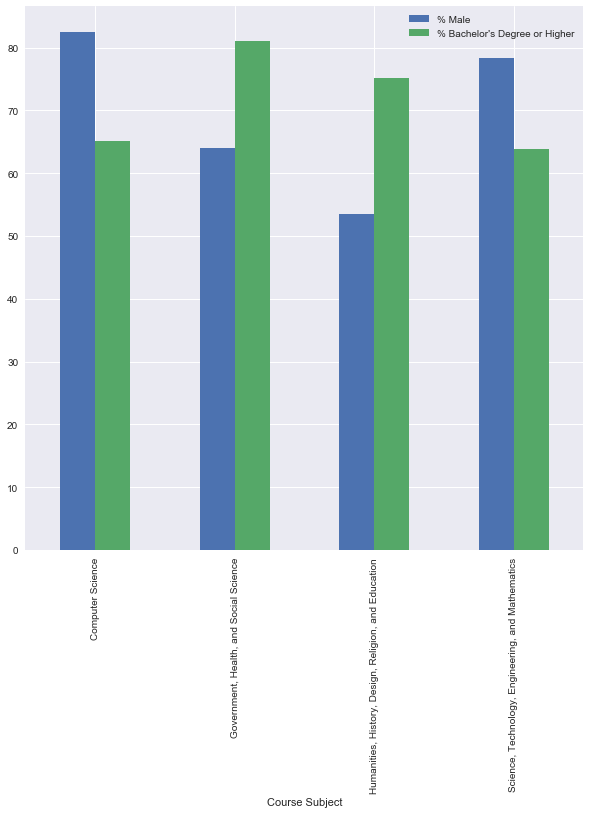

In [58]:
df.groupby("Course Subject")[["% Male","% Bachelor's Degree or Higher"]].mean().plot(kind="bar",figsize=(10,10))

Gender popularity differences by subject: 

- "Computer Science" has most male students (>80%)
- Most female students are studying "Humanities, History, Design, Religion and Education" (<50%)

It is to remark that overall there seem to be <b> more male students </b> in any covered subject.

How does the nuber of participants look grouped by course subject?

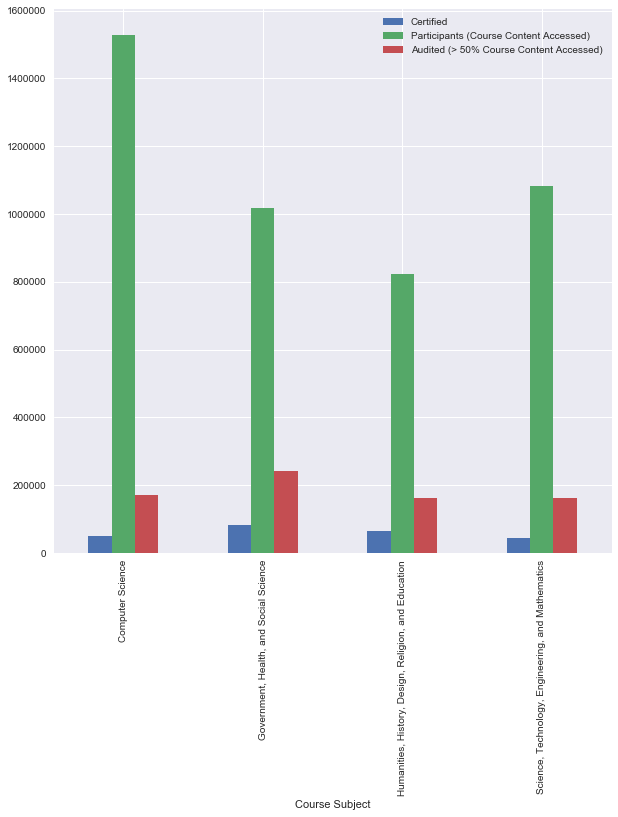

In [59]:
df.groupby("Course Subject")[["Certified","Participants (Course Content Accessed)", "Audited (> 50% Course Content Accessed)"]].sum().plot(kind="bar",figsize=(10,10))

- "Computer Science" is the most popular subject by the total number of participants
- "Government, Health and Social Science" is the subject with the most student engagement in terms of content audited and students certified
- "Humanities, History, Design, Religion and Education" is the least popular subject in terms of total participants, eventough it offers the most courses

How does the popularity in terms of number of participants change over the four years?

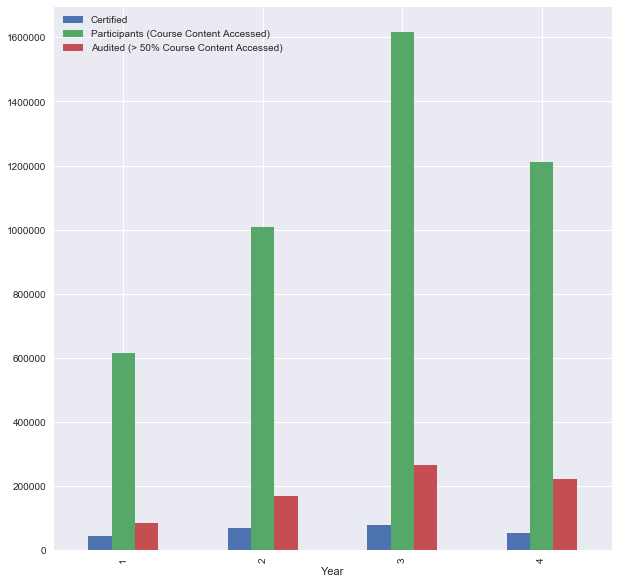

In [60]:
df.groupby("Year")[["Certified","Participants (Course Content Accessed)", "Audited (> 50% Course Content Accessed)"]].sum().plot(kind="bar",figsize=(10,10))

There is a steep incline from year 1 - 3 and year 4 sharply decreases. Why is that so?

# 2. Are there any differences between the two institutions?

How many courses offers each institution: 

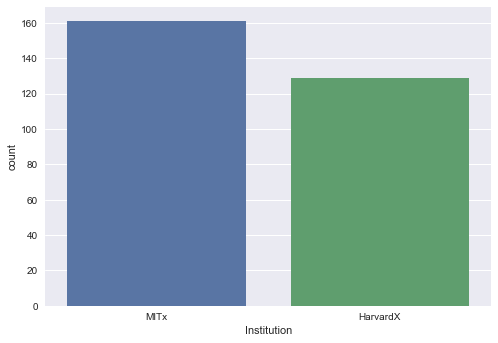

In [61]:
sns.countplot(x="Institution", data=df)

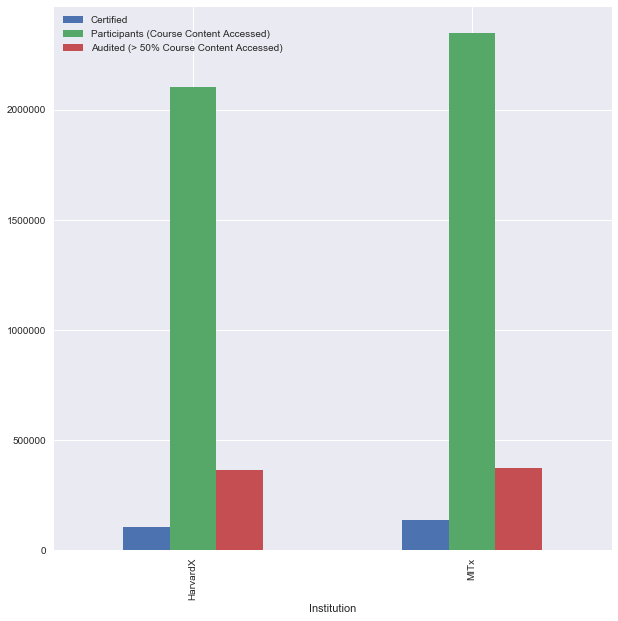

In [62]:
df.groupby("Institution")[["Certified","Participants (Course Content Accessed)", "Audited (> 50% Course Content Accessed)"]].sum().plot(kind="bar",figsize=(10,10))

We can see that MIT has slightly more total visitors while the number of certified and audited students are very similar.

Now, let's check if there are popularity differences between the two institutions in terms of the subjects:

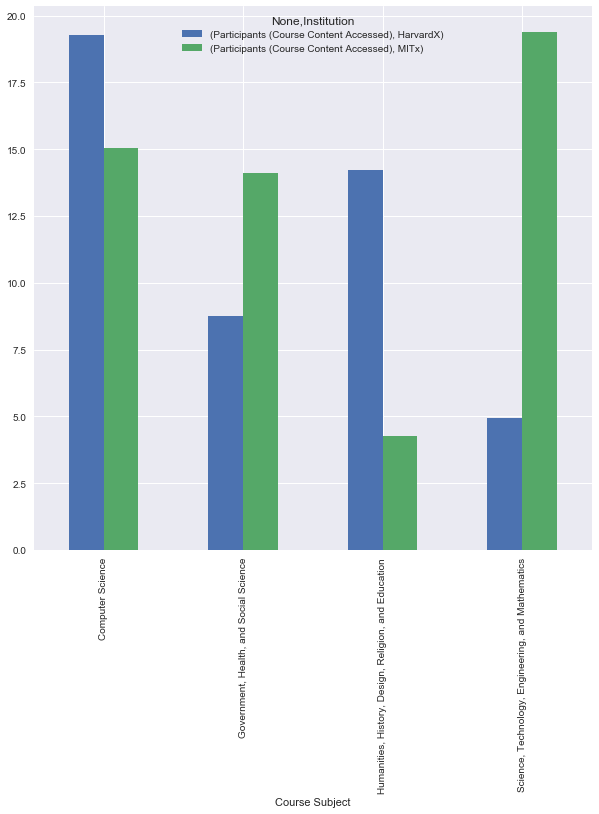

In [63]:

participants.unstack().plot(kind="bar",figsize=(10,10))



Measured in the number of participants: 

- Harvard leads in the subjects "Computer Science" and "Humanities, History, Design, Religion and Education"
- MIT leads in the subjects "Government, Health and Social Science" and "Science, Technology, Engineering and Mathematics"

Now, let's look at how the number participants by institution changes over the years: 

  Institution  Year  Participants (Course Content Accessed)
0    HarvardX     1                                  289752
1    HarvardX     2                                  441582
2    HarvardX     3                                  827343
3    HarvardX     4                                  542444
4        MITx     1                                  326722
5        MITx     2                                  565188
6        MITx     3                                  787878
7        MITx     4                                  668948


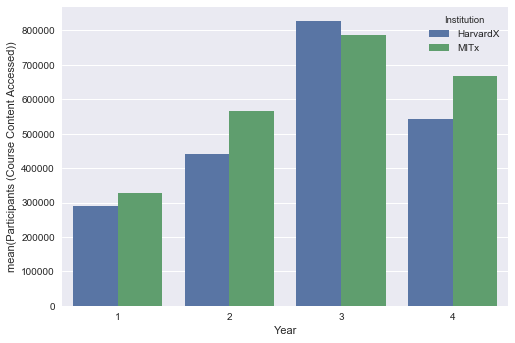

In [64]:
no_of_participents = df[['Institution',"Participants (Course Content Accessed)",'Year']].groupby(['Institution','Year']).sum()
no_of_participents = no_of_participents.reset_index()

print(no_of_participents)
sns.barplot(x='Year',y='Participants (Course Content Accessed)',hue='Institution',data=no_of_participents)

- MIT is leading for the first two years but in the third year Harvard is taking over
- The drop in the fourth year is stronger for Harvard than for MIT. 

#### Now let's have a look whether there are any age related differences: 

In [65]:
avg_age_harvard = df[(df["Institution"]=="HarvardX")]["Median Age"].mean()
avg_age_harvard

31.767441860465116

In [66]:
avg_age_mit = df[(df["Institution"]=="MITx")]["Median Age"].mean()
avg_age_mit

27.322981366459626

In [67]:
avg_age_harvard - avg_age_mit

4.44446049400549

- Measured over the mean of courses (not weighted by the number of participants) the students visiting courses from MIT are 4.4 years younger. 

### Let's look at the median age distribution by each institution: 

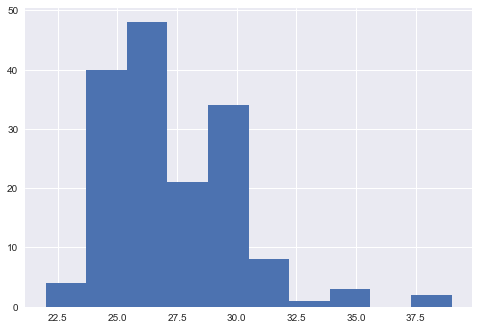

In [68]:
df[(df["Institution"]=="MITx")]['Median Age'].hist()


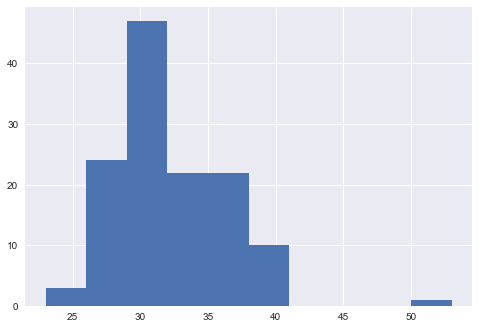

In [69]:
df[(df["Institution"]=="HarvardX")]['Median Age'].hist()


It's very interesting that both institutions have outliers in the higher age but the one of Harvard is significantly higher in age. 
Let's take a closer look at that:

- What is the courses with the highest median age at MIT?

In [70]:
df.loc[(df["Median Age"]>= 35) & (df["Institution"]=="MITx") , ["Institution","Median Age", "Course Title", "Participants (Course Content Accessed)"]]

,Institution,Median Age,Course Title,Participants (Course Content Accessed)
104,MITx,38.0,"Transforming Business, Society, and Self",21420
166,MITx,39.0,"Transforming Business, Society, and Self",23087


The course at MIT with the highest median age is "Transforming Business, Society and Self". It pretty much seems like it is never too late to change. 

- What is the course with the highest median age at Harvard?

In [71]:
harvard_high_age = df.loc[(df["Median Age"]>= 35) & (df["Institution"]=="HarvardX") , ["Institution","Median Age", "Course Title", "Participants (Course Content Accessed)"]]
harvard_high_age.sort_values(by='Median Age', ascending=False)

,Institution,Median Age,Course Title,Participants (Course Content Accessed)
49,HarvardX,53.0,HarvardX for Alumni: Explorations in Learning,7156
264,HarvardX,40.0,First Nights: L'Orfeo,1199
228,HarvardX,40.0,Practical Improvement Science in Health Care: ...,6792
245,HarvardX,39.0,World Religions Through their Scriptures: Reli...,22153
174,HarvardX,39.0,"History of the Book: Monasteries, Schools, and...",670
145,HarvardX,39.0,Poetry in America: The Civil War and Its After...,2479
34,HarvardX,38.0,Early Christianity: The Letters of Paul,33784
132,HarvardX,38.0,Poetry in America: Emily Dickinson,5261
175,HarvardX,38.0,History of the Book: The Medieval Book of Hour...,1472
285,HarvardX,38.0,First Nights: Symphonie Fantastique,615


In [72]:
len(harvard_high_age)


33

- The course with the highest median age at Harvard is "HarvardX for Alumni: Explorations in Learning" with a median age of 53

It seems like it is not only never too late to change but also never too late to learn. 

It is remarkable that Harvard has a lot more courses (total 33) with the median age above 35. 

#### Let's check if this goes vice versa for courses equal or below the median age of 25:

In [73]:
youngest_age_harvard = df.loc[(df["Median Age"]<= 25) & (df["Institution"]=="HarvardX") , ["Institution","Median Age", "Course Title", "Participants (Course Content Accessed)"]]
youngest_age_harvard.sort_values(by='Median Age', ascending=True)

,Institution,Median Age,Course Title,Participants (Course Content Accessed)
221,HarvardX,23.0,Introduction to Computer Science (2016),168335
155,HarvardX,24.0,Principles of Biochemistry,31710
99,HarvardX,25.0,Introduction to Computer Science,301082


- Harvard seems to have very little courses in that age range

How about MIT?

In [74]:
youngest_age_MIT = df.loc[(df["Median Age"]<= 25) & (df["Institution"]=="MITx") , ["Institution","Median Age", "Course Title", "Participants (Course Content Accessed)"]]
youngest_age_MIT.sort_values(by='Median Age', ascending=True)


,Institution,Median Age,Course Title,Participants (Course Content Accessed)
236,MITx,22.0,Flight Vehicle Aerodynamics,9788
224,MITx,23.0,Advanced Introductory Classical Mechanics,5747
180,MITx,23.0,Introduction to Aerodynamics,18732
281,MITx,23.0,"Circuits and Electronics: Amplification, Speed...",1645
162,MITx,24.0,Computation Structures: Digital Circuits,16094
148,MITx,24.0,Advanced Introductory Classical Mechanics,8088
128,MITx,24.0,Introduction to Aerospace Engineering: Astrona...,13525
182,MITx,24.0,"Circuits and Electronics: Amplification, Speed...",6146
106,MITx,24.0,Advanced Introductory Classical Mechanics,6980
183,MITx,24.0,Circuits and Electronics: Applications,5566


In [75]:
len(youngest_age_MIT)


44

- Indeed: MIT has a lot more courses (44 total) with a median age equal or below 25

### Key differenes between the two institutions: 

By subject: 
- Harvard leads in the subjects "Computer Science" and "Humanities, History, Design, Religion and Education"
- MIT leads in the subjects "Government, Health and Social Science" and "Science, Technology, Engineering and Mathematics"

By number of participants over time: 
- MIT is leading for the first two years but in the third year Harvard is taking over
- The drop in the fourth year is stronger for Harvard than for MIT. 

By median age of courses:
- MIT has a lot more courses with a median age equal or below 25
- Harvard has a lot more courses with a median age equal or above 35


# 3. What influences the certification rate and number of certifications?

In [76]:
total_certified = df['Certified'].sum()
total_certified

244705

In [77]:
total_participants

4449857

In [78]:
244705.0/4449857.0

0.05499165478800779

In [79]:
df['Median Hours for Certification'].describe()

count    290.000000
mean      44.364552
std       43.953709
min        0.000000
25%       12.242500
50%       26.965000
75%       64.177500
max      251.820000
Name: Median Hours for Certification, dtype: float64

##### Take a look at the median hours for certification by subject: 

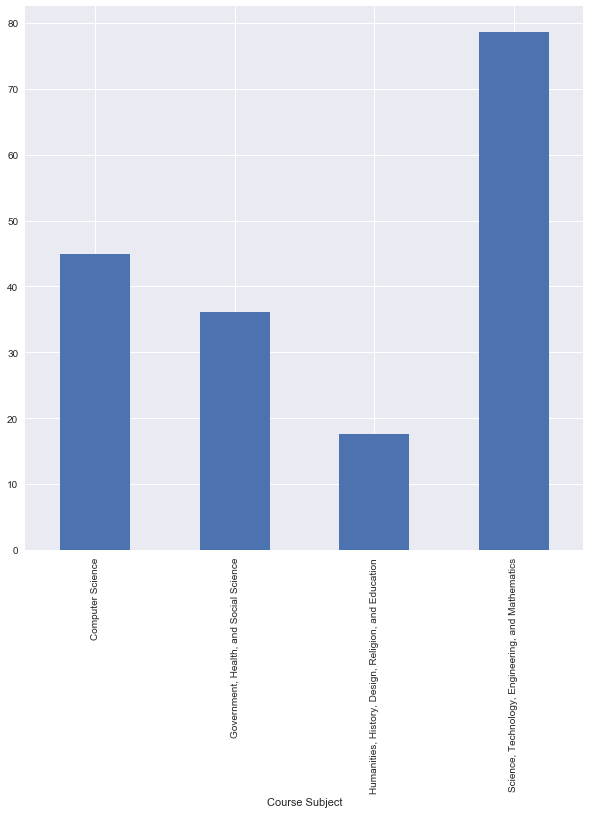

In [80]:
df.groupby("Course Subject").mean()['Median Hours for Certification'].plot(kind="bar", figsize=(10,10))

Now, lets look at the certification rate and number of certified students individually: 

In [81]:
print(df['% Certified'].describe())

count    290.000000
mean       7.782586
std        6.972437
min        0.000000
25%        2.407500
50%        5.950000
75%       10.687500
max       33.980000
Name: % Certified, dtype: float64


- The mean certification rate is 7.78% with a min at 0% and max at 34%

In [82]:
highest_certification_rate = df.loc[(df["% Certified"]>= 25) , ["% Certified","Certified","Instructors", "Institution","% Male", "Median Age", "Course Title", "Participants (Course Content Accessed)"]]

In [83]:
highest_certification_rate.sort_values(by='% Certified', ascending=False)

,% Certified,Certified,Instructors,Institution,% Male,Median Age,Course Title,Participants (Course Content Accessed)
98,33.98,1442,"Peter Bol, Bill Kirby",HarvardX,67.11,37.0,Communist Liberations,4248
89,33.87,1528,"Peter Bol, Bill Kirby",HarvardX,64.33,37.0,Creating China: The Birth of a Nation,4515
74,32.30,1505,"Peter Bol, Bill Kirby",HarvardX,63.87,38.0,"Invasions, Rebellions, and the end of Imperial...",4662
56,32.10,1686,"Peter Bol, Bill Kirby",HarvardX,64.35,35.0,From Global Empire to Global Economy,5256
59,30.09,1637,"Peter Bol, Bill Kirby",HarvardX,60.97,35.0,The Last Empire,5446
39,30.01,2226,"Peter Bol, Bill Kirby",HarvardX,58.97,34.0,Cosmopolitan Tang: Aristocratic Culture,7422
174,28.51,191,Beverly Kienzle,HarvardX,44.76,39.0,"History of the Book: Monasteries, Schools, and...",670
101,26.99,400,Paul Peterson,HarvardX,46.56,34.0,"Saving Schools: History, Politics, and Policy ...",1483
87,26.83,417,Gregory Nagy,HarvardX,50.35,34.0,The Ancient Greek Hero in 24 Hours (Hours 12-1...,1559
48,26.49,1788,"Peter Bol, Bill Kirby",HarvardX,60.51,34.0,A New National Culture,6753


- It stands out that they are all from the same instructors, namely Peter Boll (professor of East Asian Languages Civilization) and Bill Kirby (professor of Business Administration and China Studies).

In [84]:
lowest_certification_rate = df.loc[(df["% Certified"]<= 0.21) , ["% Certified", "Certified", "Instructors", "Institution","% Male", "Median Age", "Course Title", "Participants (Course Content Accessed)"]]

In [85]:
lowest_certification_rate.sort_values(by='% Certified', ascending=True)

,% Certified,Certified,Instructors,Institution,% Male,Median Age,Course Title,Participants (Course Content Accessed)
22,0.00,0,"Graham Allison, David Sanger",HarvardX,66.49,30.0,Central Challenges in American National Securi...,5857
30,0.00,0,Elisa New,HarvardX,40.81,32.0,Poetry in America: The Poetry of Early New Eng...,6446
49,0.00,0,Rob Lue,HarvardX,56.79,53.0,HarvardX for Alumni: Explorations in Learning,7156
66,0.00,0,Eric Lander,MITx,58.14,26.0,Introduction to Biology: Secret of Life,10755
281,0.12,2,"Anant Agarwal, Gerald Sussman, Piotr Mitros, C...",MITx,88.69,23.0,"Circuits and Electronics: Amplification, Speed...",1645
234,0.14,23,"Frank Bentley, Ed Barrett",MITx,80.16,28.0,Mobile Application Experiences: From a Domain ...,16407
280,0.15,18,"Anant Agarwal, Gerald Sussman, Piotr Mitros, C...",MITx,85.89,24.0,Circuits and Electronics: Basic Circuit Analysis,12218
239,0.16,9,Peter Galison,HarvardX,68.66,27.0,The Einstein Revolution,5571
80,0.17,12,Iain Stewart,MITx,88.83,27.0,Effective Field Theory,7093
250,0.21,9,"Frank Bentley, Ed Barrett",MITx,82.65,25.0,Mobile Application Experiences: Building Mobil...,4276


- The courses with the lowest certification rate are very heterogenous
- Some courses have a 0% certification rate despite a few thousand participants
- The course with the overall highest median age has also a 0% certification rate

Let's look at the number of certified students:

In [86]:
print(df['Certified'].describe())

count     290.000000
mean      843.810345
std      1105.594372
min         0.000000
25%       139.500000
50%       395.500000
75%      1201.750000
max      5783.000000
Name: Certified, dtype: float64


How does the number of certified students relate to the single courses?

In [87]:
most_certified = df.loc[(df["Certified"]>= 4500) , ["Certified","% Certified", "Instructors", "Institution","% Male", "Median Age", "Course Title", "Participants (Course Content Accessed)"]]

In [88]:
most_certified.sort_values(by='Certified', ascending=False)

,Certified,% Certified,Instructors,Institution,% Male,Median Age,Course Title,Participants (Course Content Accessed)
1,5783,9.22,"Eric Grimson, John Guttag, Chris Terman",MITx,83.50,28.0,Introduction to Computer Science and Programming,62709
9,5438,9.26,Michael Sandel,HarvardX,60.42,30.0,Justice,58779
153,5243,9.72,"Eric Grimson, John Guttag",MITx,78.53,25.0,Introduction to Computer Science and Programming,53964
4,5058,9.64,"Earl Francis Cook, Marcello Pagano",HarvardX,56.78,32.0,Health in Numbers: Quantitative Methods in Cli...,52521
27,4975,8.71,"Eric Grimson, John Guttag",MITx,82.95,28.0,Introduction to Computer Science and Programming,57147
193,4918,16.86,Dimitar Sasselov,HarvardX,60.09,26.0,Super-Earths and Life,29176
103,4738,9.57,"Eric Grimson, John Guttag",MITx,82.56,27.0,Introduction to Computer Science and Programmi...,49529
7,4607,15.86,"Esther Duflo, Abhijit Banerjee",MITx,53.76,30.0,The Challenges of Global Poverty,29044


- The courses with the highest number of certifications have a certification rate that is only slightly above the mean of 7.8%
- The courses with the most certified students are also the courses with the most participants

In [89]:
least_certified = df.loc[(df["Certified"]<= 5) , ["Certified","% Certified", "Instructors", "Institution","% Male", "Median Age", "Course Title", "Participants (Course Content Accessed)"]]

In [90]:
least_certified.sort_values(by='Certified', ascending=True)

,Certified,% Certified,Instructors,Institution,% Male,Median Age,Course Title,Participants (Course Content Accessed)
22,0,0.00,"Graham Allison, David Sanger",HarvardX,66.49,30.0,Central Challenges in American National Securi...,5857
30,0,0.00,Elisa New,HarvardX,40.81,32.0,Poetry in America: The Poetry of Early New Eng...,6446
49,0,0.00,Rob Lue,HarvardX,56.79,53.0,HarvardX for Alumni: Explorations in Learning,7156
66,0,0.00,Eric Lander,MITx,58.14,26.0,Introduction to Biology: Secret of Life,10755
281,2,0.12,"Anant Agarwal, Gerald Sussman, Piotr Mitros, C...",MITx,88.69,23.0,"Circuits and Electronics: Amplification, Speed...",1645
270,4,1.24,"Frank Bentley, Ed Barrett",MITx,76.10,29.0,Mobile Application Experiences: Reporting Rese...,322
261,5,0.75,"Frank Bentley, Ed Barrett",MITx,79.28,29.0,Mobile Application Experiences: Understanding Use,664


- There are a few courses with no single certification at all despite having many thousand participants

Let's make a correlation grid:

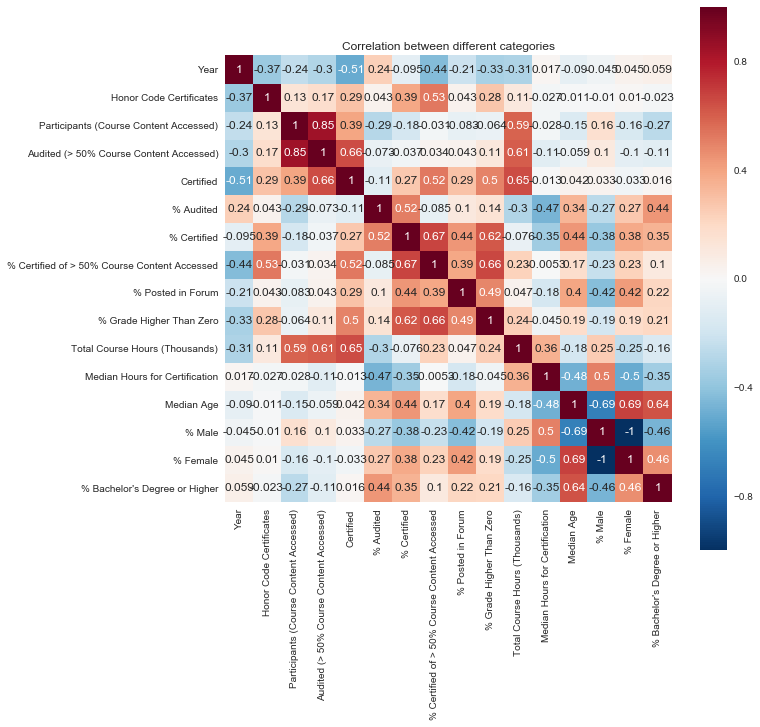

In [91]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('Correlation between different categories')

What can we learn grom this by first looking at the high positive relationships and then the high negative relationships:

High Positive Relationships:

- Participants (Course Content Accessed) and Audited (>50% Course Content Accessed): 0.85
- % Female and Median Age: 0.69
- Certified and Audited (>50% Course Content Accessed): 0.66
- % Certified and % Grade Higher Than Zero: 0.62
- Certified and Total Course Hours (Thousands): 0.65

High Negative Relationships:

- %Male and Median Age: -0.69
- Certified vs Year: -0.51
- Median Hours for Certification and % Female -0.5
- Median Hours for Certification vs Median Age: -0.49
- Median Age and Median Hours for Certification: -0.49
- % Audited vs Median Hours for Certification: -0.47
- % Male and Bachelors Degree or higher: -0.46
- Year vs % Certified of >50% course content accessed: -0.44
- Poster in Forum and % Male: -0.42


Now, let's look at the more specific correlations between the certification rate and all the other categories:

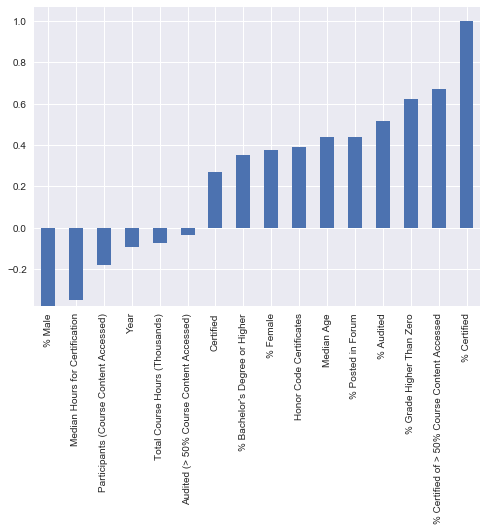

In [92]:
df.corr()['% Certified'].sort_values().plot(kind='bar');

#### The most remarkable correlation here is the negative correlation with % Male and positive correlation with % Female

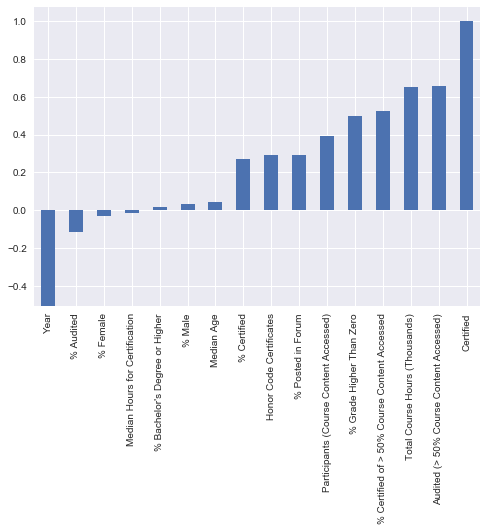

In [93]:
df.corr()['Certified'].sort_values().plot(kind='bar');

Let's see if the number of certified students varies by subject: 

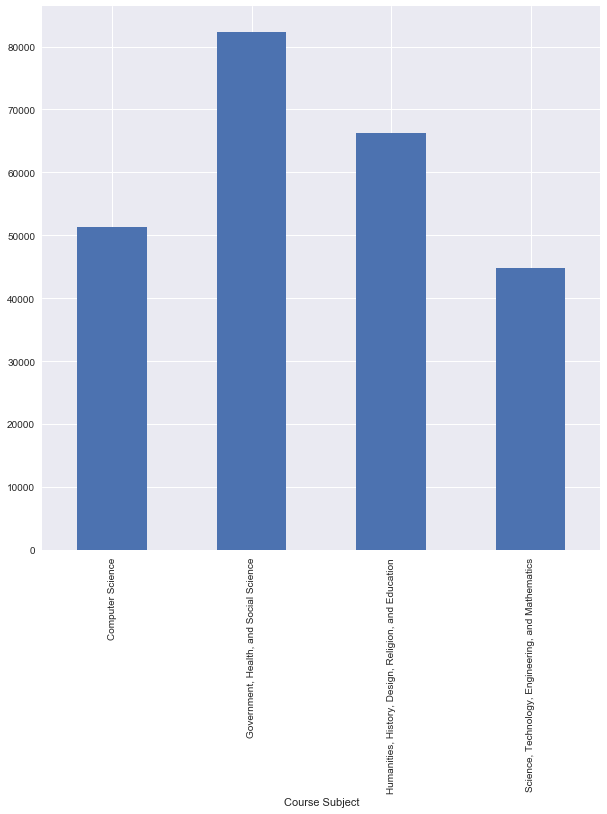

In [94]:
df.groupby("Course Subject")["Certified"].sum().plot(kind="bar",figsize=(10,10))

- Certification Ranking by subject: 

Let's do the same for the certification rate:

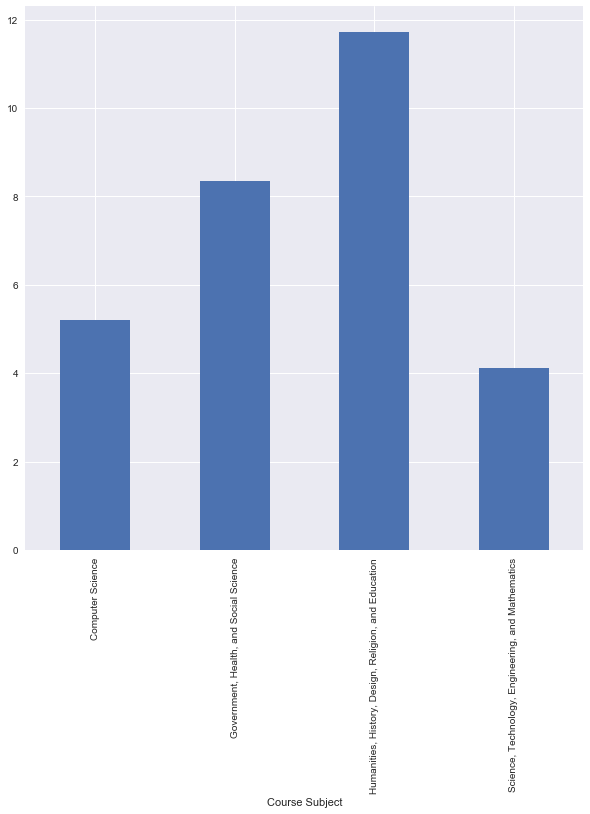

In [95]:
df.groupby("Course Subject")["% Certified"].mean().plot(kind="bar",figsize=(10,10))

 - It is interesting to see that the subject with the most popular course (computer science) has the second lowest certification rate. 

Now lets look if the number of certified students changes over the years:

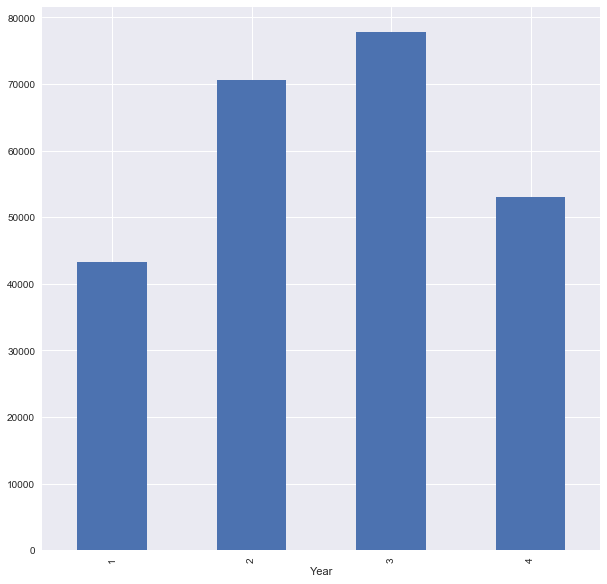

In [96]:
df.groupby("Year")["Certified"].sum().plot(kind="bar",figsize=(10,10))

#### Which courses take longest for the certification?


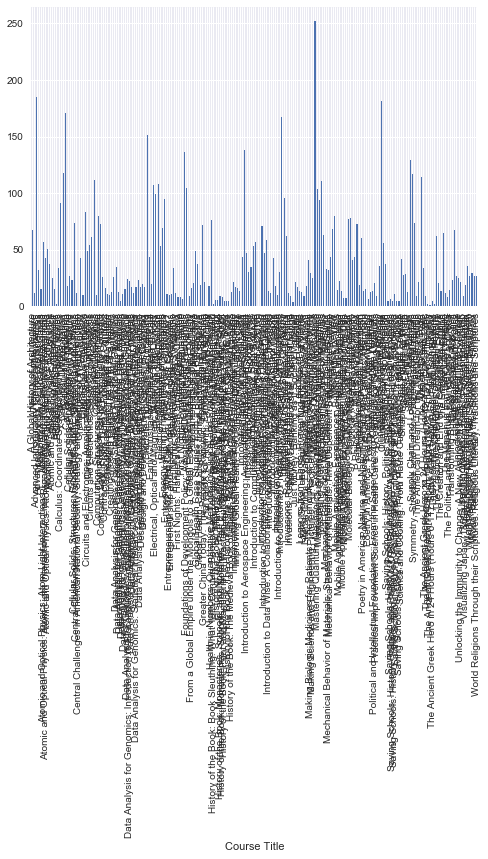

In [98]:
longest_courses = df.groupby('Course Title')['Median Hours for Certification']
longest_courses.mean().plot(kind='bar')

In [99]:
toughest_certified = df.loc[(df["Median Hours for Certification"]>= 150) , ["Course Title","Certified","% Certified", "Median Hours for Certification", "Institution", "Median Age", "Participants (Course Content Accessed)"]]
toughest_certified.sort_values(by="Median Hours for Certification", ascending=False)

,Course Title,Certified,% Certified,Median Hours for Certification,Institution,Median Age,Participants (Course Content Accessed)
120,Mastering Quantum Mechanics,393,3.59,251.82,MITx,26.0,10932
235,Introduction to Probability: The Science of Un...,136,0.78,212.83,MITx,27.0,17354
224,Advanced Introductory Classical Mechanics,101,1.76,200.43,MITx,23.0,5747
148,Advanced Introductory Classical Mechanics,168,2.08,182.95,MITx,24.0,8088
191,Principles of Synthetic Biology,106,0.92,181.45,MITx,25.0,11574
106,Advanced Introductory Classical Mechanics,201,2.88,172.70,MITx,24.0,6980
217,Calculus: Integration,336,4.63,170.68,MITx,25.0,7260
115,Introduction to Probability: The Science of Un...,410,1.82,167.72,MITx,27.0,22537
236,Flight Vehicle Aerodynamics,58,0.59,160.04,MITx,22.0,9788
237,Supply Chain and Logistics Fundamentals,2471,13.22,158.00,MITx,29.0,18686


In [100]:
easiest_certified = df.loc[(df["Median Hours for Certification"]<= 4) , ["Course Title","Certified","% Certified","Median Hours for Certification", "Institution", "Median Age", "Participants (Course Content Accessed)"]]
easiest_certified.sort_values(by="Median Hours for Certification", ascending=True)

,Course Title,Certified,% Certified,Median Hours for Certification,Institution,Median Age,Participants (Course Content Accessed)
3,Introduction to Computer Science,1439,1.11,0.00,HarvardX,28.0,129400
22,Central Challenges in American National Securi...,0,0.00,0.00,HarvardX,30.0,5857
30,Poetry in America: The Poetry of Early New Eng...,0,0.00,0.00,HarvardX,32.0,6446
32,Introduction to Computer Science,1208,0.47,0.00,HarvardX,27.0,259577
49,HarvardX for Alumni: Explorations in Learning,0,0.00,0.00,HarvardX,53.0,7156
66,Introduction to Biology: Secret of Life,0,0.00,0.00,MITx,26.0,10755
99,Introduction to Computer Science,1523,0.51,0.00,HarvardX,25.0,301082
221,Introduction to Computer Science (2016),417,0.25,0.00,HarvardX,23.0,168335
91,The Ancient Greek Hero in 24 Hours (Hours 16-2...,376,23.37,1.42,HarvardX,33.0,1615
96,The Ancient Greek Hero: Plato and Beyond,367,16.68,1.52,HarvardX,34.0,2201


## Key Findings: 

#### 1. How popular are the courses on edX? 

By course
By subject
By gender

- The platform is very popular with 4'449'857 course participants over the 4 years
- These course participants are distributed over 188 unique courses
- Some courses like the 'Introduction to Computer Science Course' were offered up to 10 times during the 4 years, with a total of 290 course offerings
- 32% (1.47 Mio. students) of all the participants are in the five most popular courses
- Some instructors produced up to 10 different online courses but the majority have one or two
- 10% of all the courses are instructed by three Harvard professors which have together 5% of the students
- The course subject 'Computer Science' has by far the most participants (152'7334) but the smalest number of courses (~30) and 'Humanities, History, Design, Religion, and Education' has the least participants by subject (82'2503) but the most course offerings (~90)
- The subject 'Computer Science' is most popular amongst men (>80% male) and 'Humanities, History, Design, Religion, and Education' is most equal gender wise with about 45% women 
- In every subject at least 65% of the students have a bachelor degree of higher
- Overall popularity in terms of participants has steadily increased for the first three years and decreased in year four

#### The five most popular courses: 
1. "Introduction to Computer Science" cs50 at Harvard with 859'394 students
2. "Introduction to Computer Science" 6.00.1x at MIT with 364099 students
3. "Introduction to Computer Science" 6.00x at MIT with 128089 students
4. "The Analytics Edge" at MIT with 122'762 students
5. "Circuits and Electronics" at MIT with 116335 students


#### 2. Are there any noteable difference between the two institutions? 


##### Key differenes between the two institutions: 

By course: 
- MIT offers about 30 courses more than Harvard 
- 4 out of the 5 most popular courses are all at MIT

By subject: 
- Harvard leads in the subjects "Computer Science" and "Humanities, History, Design, Religion and Education"
- MIT leads in the subjects "Government, Health and Social Science" and "Science, Technology, Engineering and Mathematics"

By number of participants over time: 
- MIT is leading for the first two years but in the third year Harvard is taking over but the overall leader is MIT
- The drop in the fourth year is stronger for Harvard than for MIT
- Both institutions have a similar certification rate which is at about 5%

By median age of courses:
- MIT has a lot more courses with a median age equal or below 25
- Harvard has a lot more courses with a median age equal or above 35


#### 3. What influences the certification rate?

- The certification rate is at about 5.5%


- STEM thoughest and HHDRE the easysiest in terms of the median hours needed for a certification
- The courses with the highest certification rate (30-35%) are all history courses at Harvard taught by Peter Bol, Bill Kirby

- The top three courses with most certified students are all courses in the top 10 ranking in number of participants and have all certification rates of 9-10%
- The min certification rate is at 0% and max at 34%

#### Correlations with the certification
- Certified and Audited (>50% Course Content Accessed): 0.66
- % Certified and % Grade Higher Than Zero: 0.62
- Certified and Total Course Hours (Thousands): 0.65
- Certified vs Year: -0.51
- Median Hours for Certification and % Female -0.5
- Median Hours for Certification vs Median Age: -0.49